In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random

## Loading dataset

In [2]:
dataset_name = 'mnist'

In [3]:
if dataset_name == 'mnist':
	(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
elif dataset_name == 'cifar10':
	(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Preprocessing data

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Exploring the data

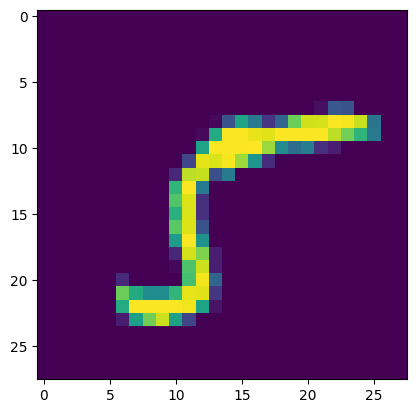

In [9]:
plt.imshow(random.choice(X_train))
plt.show()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Defining the network

In [21]:
model = Sequential([
	Input(shape=(X_train.shape[1], X_train.shape[2])),
	Flatten(),
	Dense(128, activation='relu'),
	Dropout(0.2),
	Dense(64, activation='relu'),
	Dropout(0.2),
	Dense(10, activation='softmax')
])

## Training the model

In [22]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.8285 - accuracy: 0.7517 - val_loss: 0.3354 - val_accuracy: 0.9059
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4086 - accuracy: 0.8796 - val_loss: 0.2524 - val_accuracy: 0.9262
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3312 - accuracy: 0.9027 - val_loss: 0.2136 - val_accuracy: 0.9376
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2849 - accuracy: 0.9161 - val_loss: 0.1871 - val_accuracy: 0.9435
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2531 - accuracy: 0.9257 - val_loss: 0.1671 - val_accuracy: 0.9502
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9323 - val_loss: 0.1520 - val_accuracy: 0.9542
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2114 - accuracy: 0.9378 - val_loss: 0.1409 - val_accurac

## Plotting loss and accuracy

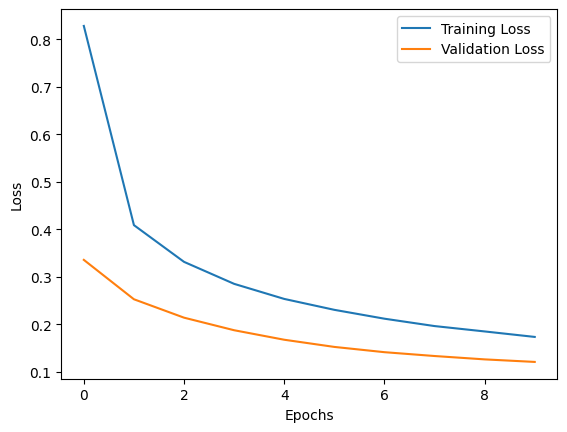

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

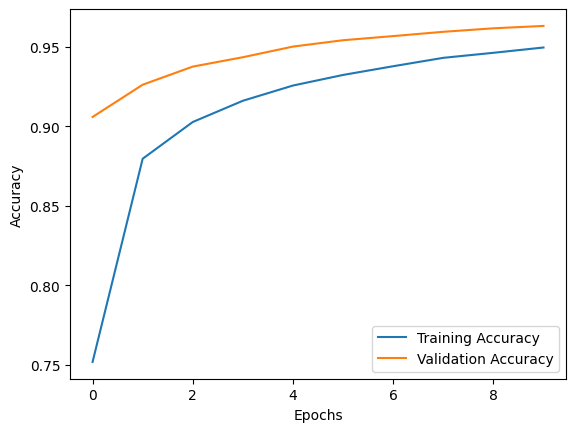

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9632


## Predicitons

In [27]:
y_preds = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Actual label: 1
Predicted label: 1


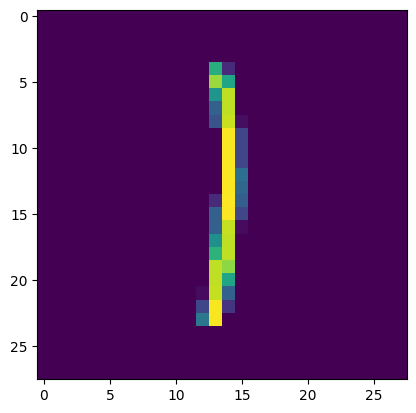

In [28]:
plt.imshow(X_test[40])
print(f'Actual label: {np.argmax(y_test[40])}')
print(f'Predicted label: {np.argmax(y_preds[40])}')
plt.show()